In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')
pd.options.display.float_format = '{:20,.2f}'.format

In [23]:
data_rating = pd.io.parsers.read_csv('raw/rating.csv')
data_anime = pd.io.parsers.read_csv('raw/anime.csv')

print "Animes: "
print data_anime.describe()

print "\nRatings: "
print data_rating.describe()

Animes: 
                  anime_id               rating              members
count            12,294.00            12,064.00            12,294.00
mean             14,058.22                 6.47            18,071.34
std              11,455.29                 1.03            54,820.68
min                   1.00                 1.67                 5.00
25%               3,484.25                 5.88               225.00
50%              10,260.50                 6.57             1,550.00
75%              24,794.50                 7.18             9,437.00
max              34,527.00                10.00         1,013,917.00

Ratings: 
                   user_id             anime_id               rating
count         7,813,737.00         7,813,737.00         7,813,737.00
mean             36,727.96             8,909.07                 6.14
std              20,997.95             8,883.95                 3.73
min                   1.00                 1.00                -1.00
25%           

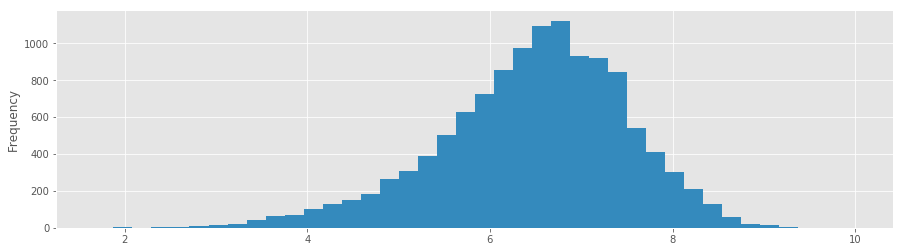

In [90]:
data_movies['rating'].plot(kind="hist", bins=40,figsize=(15,4))
plt.show()

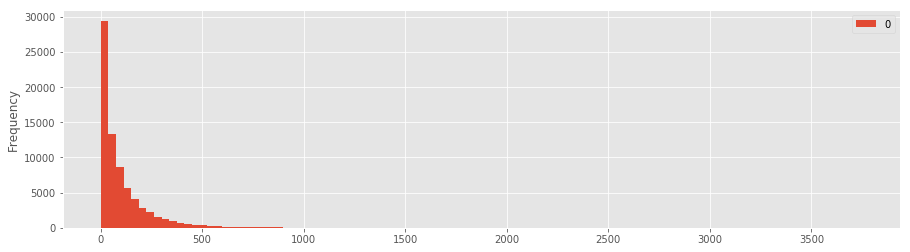

In [79]:
data_rating.groupby('user_id').size().to_frame().sort_values(by=0)[:-1].plot(kind="hist", bins=100, figsize=(15,4))
plt.show()

In [32]:
print 'Anime rating:'
print data_anime['rating'].describe(include='all')

for t in ['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music']:
    print '\nRating: ' + t
    print data_anime.loc[data_anime['type'] == t]['rating'].describe(include='all')

Anime rating:
count              12,064.00
mean                    6.47
std                     1.03
min                     1.67
25%                     5.88
50%                     6.57
75%                     7.18
max                    10.00
Name: rating, dtype: float64

Rating: TV
count               3,671.00
mean                    6.90
std                     0.86
min                     2.67
25%                     6.44
50%                     6.94
75%                     7.46
max                     9.60
Name: rating, dtype: float64

Rating: OVA
count               3,285.00
mean                    6.38
std                     0.86
min                     2.00
25%                     5.85
50%                     6.38
75%                     6.92
max                     9.25
Name: rating, dtype: float64

Rating: Movie
count               2,297.00
mean                    6.32
std                     1.21
min                     1.92
25%                     5.42
50%               

In [35]:
_genre = data_anime['genre']
_genre_list = []
for g in _genre:
    try:
        _genre_list.extend(map(lambda s: s.strip(), g.split(',')))
    except:
        pass
print len(sorted(set(_genre_list)))
print sorted(set(_genre_list))

43
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


36285

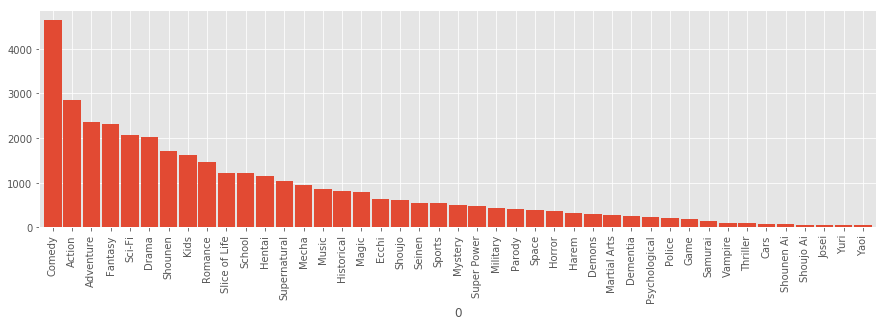

In [92]:
genre_count = pd.DataFrame(_genre_list).groupby(0)
genre_count.size().sort_values(ascending=False).plot(kind="bar", width=0.9, figsize=(15,4))
plt.show()